## Malaria infected or non-infected classification

In [37]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from matplotlib.image import imread

### Analysing the Data Images

In [8]:
# file_path
file_path = 'C:\\Users\\budha\\Desktop\\Learnings\\Tensorflow\\Course_slides\\cell_images\\cell_images'

In [9]:
# read the files in the file_path
os.listdir(file_path)

['test', 'train']

In [10]:
# check the contents
os.listdir(file_path+'\\train')

['parasitized', 'uninfected']

In [11]:
# set up the train and test file path
train_path = file_path + "\\train"
test_path = file_path + "\\test"

In [13]:
# check the contents of the train folder
os.listdir(train_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [16]:
# total no of images in train folder
len(os.listdir(train_path+'\\parasitized')), len(os.listdir(train_path+'\\uninfected'))

(12480, 12480)

In [17]:
# total no of images in test folder
len(os.listdir(test_path+'\\parasitized')), len(os.listdir(test_path+'\\uninfected'))

(1300, 1300)

In [18]:
# lets read one train image and check
# check the first image in parasitized folder under train folder

os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [35]:
# reading the image
para_image_path = train_path+'\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [38]:
para_image = imread(para_image_path)

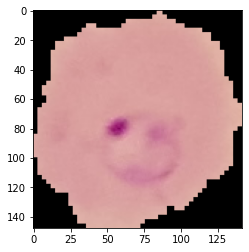

In [39]:
plt.imshow(para_image)

In [43]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [44]:
# similarly lets read image of a uninfected image
uninfected_img_path = train_path+'\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_img = imread(uninfected_img_path)

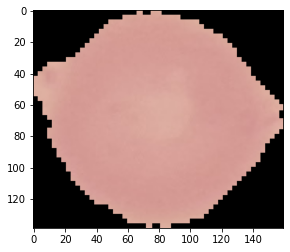

In [45]:
plt.imshow(uninfected_img)

- Now, since this is real world datasets, the dimensions of the images in the datasets may not be the same 
- We will have to make the dimensions consistent as the CNN will not be able to figure out
- first lets check the dimensions

In [47]:
# check the shape of an image
uninfected_img.shape, para_image.shape

((139, 160, 3), (148, 142, 3))

- In this kind of situtations, it is recommended to scale the dimensions of the images to the average dimensions of all the images
- Lets try to find the average dimensions of the images

In [51]:
os.listdir(train_path+'\\parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [55]:
# read each image in the train folder and get the average dimensions

dim1 = []
dim2 = []

# for every image in parasitized folder
for image_path in os.listdir(test_path+'\\uninfected'):
    
#    print(train_path+'\\parasitized\\'+image_path)
    image = imread(test_path+'\\uninfected\\'+image_path)
#     print(image.shape)
#     break
    dim_1, dim_2, color_channel = image.shape
    dim1.append(dim_1)
    dim2.append(dim_2)  

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


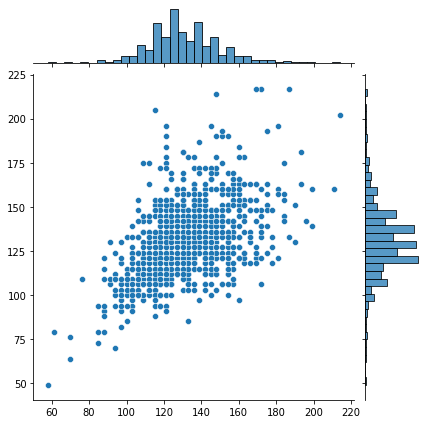

In [56]:
# plot and check
sns.jointplot(dim1, dim2)

- Seems the average values lies somewhere around 130 for both dimensions

In [60]:
np.array(dim1).mean(), np.array(dim2).mean()

(130.92538461538462, 130.75)

- So, we would want our image shape to be as (130, 130, 3)
- width 130, height 130 and color channel - 3

In [61]:
# set up our image shape

image_shape = (130, 130, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

### Manipulating the data

- if we have large number of data, then we really dont need to manipulate and create simulated data from the original data
- But in case if we dont have enough data then, we can still generate new forms of data by transforming the original data
- Like for this case, we have only 12480 training data, so we can generate more data
- This can be done by using ImageDataGenerator from keras

In [62]:
# import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
# check doc for ImageDataGenerator
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [187]:
# set up Image Data Generator object

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

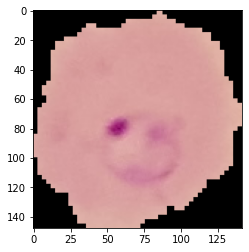

In [67]:
# show the original image
plt.imshow(para_image)

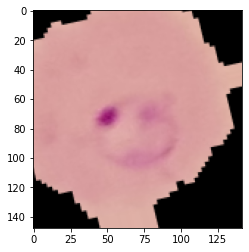

In [68]:
# show the random transform image
plt.imshow(image_gen.random_transform(para_image))

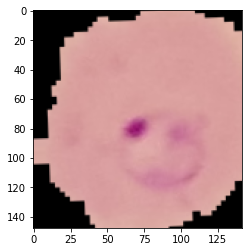

In [69]:
# show another random transform image
plt.imshow(image_gen.random_transform(para_image))

- This way we can transform original image and generate new sets of image

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [188]:
# read image from the folder or directory

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [189]:
# similary for test

image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [190]:
# can also check the indices of the target classes
# these indices will need to be use when trying to identify predicted classes

image_gen.flow_from_directory(test_path).class_indices

Found 2600 images belonging to 2 classes.


{'parasitized': 0, 'uninfected': 1}

## Creating Model

In [194]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout, MaxPooling2D, Activation

In [195]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [166]:
# initialize model

model = Sequential()

# add Conv2d layer
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 #strides=(1,1),#padding='valid',
                 input_shape = image_shape,
                 activation='relu'))

# add maxpool layer
model.add(MaxPool2D(pool_size = (2,2)))

# add Conv2d layer
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 #strides=(1,1),#padding='valid',
                 input_shape = image_shape,
                 activation='relu'))

# add maxpool layer
model.add(MaxPool2D(pool_size = (2,2)))

# add Conv2d layer
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 #strides=(1,1),#padding='valid',
                 input_shape = image_shape,
                 activation='relu'))

# add maxpool layer
model.add(MaxPool2D(pool_size = (2,2)))

# add Flatten
model.add(Flatten())

# add Dense Layer
model.add(Dense(128, activation ='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# add output layer
# 1 - because it is a binary classification problem, and so also the activation function to be sigmoid
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [196]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 64)      

In [78]:
# add early stop and dropout since it has large data points
from tensorflow.keras.callbacks import EarlyStopping

In [197]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [80]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dime

In [83]:
target_size = image_shape[:2]
target_size

(130, 130)

In [198]:
batch_size = 16

In [199]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [200]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [172]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
# train and fit the model
results = model.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 492s 315ms/step - loss: 0.4025 - accuracy: 0.8128 - val_loss: 0.1929 - val_accuracy: 0.9350
Epoch 2/20
1560/1560 [==============================] - 554s 355ms/step - loss: 0.1727 - accuracy: 0.9459 - val_loss: 0.1658 - val_accuracy: 0.9473
Epoch 3/20
1560/1560 [==============================] - 534s 342ms/step - loss: 0.1654 - accuracy: 0.9485 - val_loss: 0.1604 - val_accuracy: 0.9423
Epoch 4/20
1560/1560 [==============================] - 529s 339ms/step - loss: 0.1560 - accuracy: 0.9499 - val_loss: 0.1733 - val_accuracy: 0.9458
Epoch 5/20
1560/1560 [==============================] - 537s 344ms/step - loss: 0.1594 - accuracy: 0.9503 - val_loss: 0.1685 - val_accuracy: 0.9408


In [202]:
# get the metrics
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.402459,0.812765,0.192943,0.935000
1,0.172710,0.945909,0.165785,0.947308
2,0.165443,0.948514,0.160383,0.942308
3,0.155997,0.949876,0.173271,0.945769
4,0.159440,0.950276,0.168477,0.940769


<AxesSubplot:>

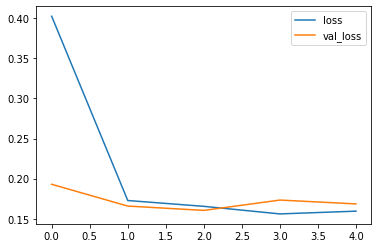

In [203]:
# analyze the metrics

metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

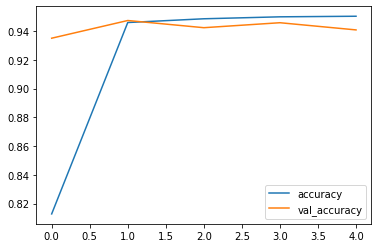

In [204]:
metrics[['accuracy', 'val_accuracy']].plot()

In [205]:
# metrics used while training

model.metrics_names

['loss', 'accuracy']

In [177]:
# this gives the loss and accuracy of the model
model.evaluate_generator(test_image_gen)

[0.16275043785572052, 0.9457692503929138]

## Model Evaluation

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [206]:
# get predictions
test_pred_probs = model.predict_generator(test_image_gen)

In [207]:
test_pred_probs

array([[9.7597505e-05],
       [8.4556756e-05],
       [2.5786500e-04],
       ...,
       [9.7815400e-01],
       [9.7987252e-01],
       [9.3586695e-01]], dtype=float32)

In [208]:
test_preds.max(), test_preds.min()

(0.99227893, 4.467385e-15)

In [209]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [210]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

- From the above, we can see that parasitized or infected group is represented by 0 
- And uninfected class is represented by 1
- So, we will label our predicted values based on these class labels

In [215]:
# setting to 1 if test_preds > 0.5 else 0
test_preds_labels = test_pred_probs > 0.5

In [216]:
test_preds_labels

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [227]:
print(classification_report(test_image_gen.classes, test_preds_labels))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [218]:
confusion_matrix(test_image_gen.classes,test_preds_labels)

array([[1195,  105],
       [  39, 1261]], dtype=int64)

In [219]:
## saving the model
# this will save in the folder 
model.save("malaria_predictor")

INFO:tensorflow:Assets written to: malaria_predictor\assets


INFO:tensorflow:Assets written to: malaria_predictor\assets


In [220]:
from tensorflow.keras.models import load_model

In [223]:
# It can be used to reconstruct the model identically.
reconstructed_model = load_model("malaria_predictor")

In [224]:
# get predictions
test_probs_2 = reconstructed_model.predict_generator(test_image_gen)

In [225]:
# get pred classes
test_probs_2_classes = test_probs_2 > 0.5

In [226]:
print(classification_report(test_image_gen.classes, test_probs_2_classes))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



### Predicting new data

In [228]:
from tensorflow.keras.preprocessing import image

In [230]:
para_image_path

'C:\\Users\\budha\\Desktop\\Learnings\\Tensorflow\\Course_slides\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [232]:
# load the new image 
new_image = image.load_img(para_image_path, target_size=image_shape)

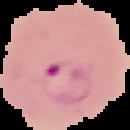

In [233]:
new_image

In [234]:
type(new_image)

PIL.Image.Image

In [235]:
# now in order to use for prediction, we will need to covert these into arrays
new_image_array = image.img_to_array(new_image)

In [237]:
# check the shape of the image
new_image_array.shape

(130, 130, 3)

In [239]:
# now again, this needs to be reshaped to (1,130, 130, 3)
# can do that as follows

new_data_image = np.expand_dims(new_image_array, axis = 0)

In [240]:
# check the shape
new_data_image.shape

(1, 130, 130, 3)

In [242]:
# using our model
model.predict(new_data_image)

1/1 [==============================] - 0s 171ms/step


array([[0.]], dtype=float32)

In [241]:
# now we can predict using reconstructed model

reconstructed_model.predict(new_data_image)

1/1 [==============================] - 0s 485ms/step


array([[0.]], dtype=float32)